<a href="https://colab.research.google.com/github/DiegoSamanezDenis/Pendulum-Project/blob/main/Pendulum_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Diego Samanez Denis, Lucas Woo

**Introduction**

In this project, we will be studying the motion of a simple pendulum, with and without the small angle approximation, using the Verlet and Euler algorithms.  

The pendulum is a classic example of a simple harmonic oscillator, in which the motion is described by a second-order ordinary differential equation (ODE). The small angle approximation says that the amplitude of angular displacement of the pendulum’s motion is small enough so that the angular acceleration may be reduced

> FROM $-(g/l)*sin(theta)$

> TO $-(g/l)*theta$.


This original angular acceleration is derived from the force

>   $F=–mgcos(theta)$


applied on the ball at the end of the pendulum. The objective of this project is to compare 4 different methods of coding for the oscillations of a pendulum. Through this comparison, we may be able to observe when each method is optimal and when it is redundant as the amplitudes and periods change when we increase the initial angle.








**Model and Numerical Methods**

A simulation of the simple pendulum was simulated with the use of several different mathematical models, which relied on the same basic components and initial conditions such as increment of the time steps, the initial period, the pendulum length, and the step count.



In order to implement the Euler method for simulating a pendulum, we need to first specify these initial conditions. The Euler method then proceeds by approximating the value of the pendulum’s angle, angular velocity, and angular acceleration at the next slope at the next time step.

The small angle acceleration is a mathematical technique that is used to simplify the analysis of the simple pendulum. When the amplitude of the pendulum’s swing is small, the angle between the string and the vertical axis is also small. With this respect, we can simplify the equation for the motion of a pendulum using the fact that sin(θ) ≈ θ and cos(θ) ≈ 1. However, it is important to note that this approximation is only valid when the amplitude of the swing is relatively small (<10°).  


> https://www.acs.psu.edu/drussell/Demos/Pendulum/Pendulum.html




The velocity Verlet algorithm is a numerical method used to simulate the motion of a pendulum. In order to calculate the trajectory of the system, the algorithm begins by computing the angle at a given time, and then determining the acceleration using an approach based on the pendulum’s length and the angle of displacement. The algorithm then takes a half step update to determine the angular velocity, which involves adding the average of the angular acceleration at the current and following time steps to the current angular velocity, multiplied by the time interval. Ultimately, this half-step update helps improve the overall accuracy of the predictions for each time step, resulting in more precise simulations.  

> https://www.algorithm-archive.org/contents/verlet_integration/verlet_integration.html



To ensure the correctness of our code, we will create a separate graph comparing the period and the initial angle for the Verlet algorithm with and without the small angle approximation. Assuming that the code is working like it should, we would observe a difference in the periods calculated using these two methods.



**Validation**

In a real-life model of a simple harmonic pendulum, the wave would experience a decrease in amplitude and an increase in period as time went on. This concept is represented by the Verlet method without small angle approximation. We could verify that the code ran by graphing the period versus the angle of the Verlet method with and without small angle approximation. The results matched the intended results as a clear increase in period was seen in the latter as the initial angle was increased whilst a constant period was maintained by the former.


**Results**

We plotted an angle vs time graph in which we could compare the sinusoidal waves of both Verlet methods. From this graph, a constant amplitude can be seen for both Verlet with and without the small angle approximation. Additionally, as the period of the small angle approximation remains constant, the period of the normal Verlet gradually increases over time. This can be seen in the deviation of the normal Verlet from a shared path at t=0 and is backed by the results of the previous graph in which it was established that normal Verlet’s periods grow over time whilst the small angle approximation’s remains constant.

To compare all four methods used in this project, graphs of each method were created in which the linear trajectory of the change in amplitude was marked. This allowed us to visibly observe the differences between all methods as well as allowing us to create a final graph of angle versus time to compare the amplitudes at each iteration. The graph demonstrated that the amplitude of Euler’s method without small angle approximation grew very quickly, followed by Euler’s method with small angle approximation which still had large increases in amplitude. Both Verlet methods kept nearly the same amplitudes with no visible increase in amplitude.

**Discussion**

The results obtained from the simulations using different numerical methods have significant differences, especially between the small angle approximation and the Verlet algorithm. The graph depicting the relationship between the period and initial angle demonstrates the period that increases over time due to the increase in amplitude from 3.44 to 4. In contrast, the period for the small angle approximation remains constant at 3.4, indicating that the period is independent of the initial angle and amplitude. For this reason, Verlet with small angle approximation does not produce accurate results when using large angles.  

In the last graph, the changes in amplitude of all four methods were plotted to establish a comparison. Increasing drifting amplitudes were observed in both Euler methods. This result is inaccurate with reality as a pendulum’s amplitude should either remain constant in a vacuum or decrease with air resistance. Our assumptions on the next slope at the next time step force the code to produce overcompensating oscillations that add energy to a system when it should be conserved. It is therefore true that Verlet algorithm is more efficient than Euler algorithm and is even more precise when it is using small angle approximation as it keeps a constant amplitude.

Points on which we could’ve improved include the use of higher order differential equations to increase the precision of the next time steps and hence more accurately map the oscillations of the methods. We could’ve also used smaller time steps to lower the time between the readjustments of the code to match the methods oscillations. It would've also been intriguing to code for air resistance to develop an even more realistic model of the pendulum.


**Conclusion**

To summarize the results, after conducting several simulations to determine the accuracy of different mathematical models, it was found that the Velocity Verlet approach is the most accurate. When it comes to the small angle approximation, the Velocity Verlet approach becomes slightly less accurate, as it only works well for angles under 10 degrees.  

In contrast, the small angle approximation with Euler’s method was found to be the least accurate, with the amplitude increasing unrealistically over time even with the small angle approximation.

# Euler's Method Without the Small Angle Approximation

In [ ]:
#LIBRARIES
import math
import matplotlib.pyplot as plt
import numpy as np

#Constants
#DT = 0.01
#T_MAX = 30.0
#theta_0= 0.01
#omega_0= 0

def euler_method(DT,T_MAX,theta_0,omega_0):
# Initial Constants
  STEPS = int(T_MAX/DT)
  g=9.81
  L= 3 #Length
  period=0
  alpha_0=-(g/L)*theta_0

  # Setup where first element is set based on initial conditions
  t = [0]
  delta=0
  theta=[theta_0]
  omega=[omega_0]
  alpha=[alpha_0]


  # Main Loop
  for i in range(STEPS):
    t.append(t[i]+DT)
    alpha.append((-g/L)*math.sin(theta[i]) )
    omega.append(omega[i]+alpha[i]*DT)
    theta.append(theta[i]+omega[i]*DT)
    if theta[i+1]<0:
      period= t[-1]*4
      return period, t, theta
  # Plot a scatter plot of x coordinates vs y

  #plt.plot(t,theta,label='Euler Method')
  #plt.plot(period,theta,label='Euler Method')
  #plt.legend()

# Euler's Method With the Small Angle Approximation

In [ ]:
#CONSTANTS
#DT = 0.01
#T_MAX = 30.0
#theta_0= 0.01
#omega_0= 0

def small_angle_euler(DT,T_MAX,theta_0,omega_0):

  STEPS = int(T_MAX/DT)
  g=9.81
  L= 3 #Length

  #INITIAL CONDITIONS

  alpha_0= -(g/1)*theta_0

  t = [0]
  delta=0
  theta=[theta_0]
  omega=[omega_0]
  alpha=[alpha_0]


  for i in range(STEPS):
    t.append(t[i]+DT)
    omega.append(omega[i]+alpha[i]*DT)
    theta.append(theta[i]+(omega[i]*DT+delta))
    alpha.append((-g/L)*theta[i+1])
    if theta[i+1]<0:
      period= t[-1]*4
      return period, t, theta
  # Plot a scatter plot of x coordinates vs y
  #plt.plot(t,theta,label='Small Angle')
  #plt.legend()

# Verlet's Method Using the Small Angle Approximation

In [ ]:
#CONSTANTS
DT = 0.01
T_MAX = 30.0
theta_0= 0.01
omega_0= 0

def small_angle_verlet(DT,T_MAX,theta_0,omega_0):

  STEPS = int(T_MAX/DT)
  g=9.81
  L= 3 #Length

  #INITIAL CONDITIONS

  alpha_0= -(g/1)*theta_0

  t = [0]
  delta=0
  theta=[theta_0]
  omega=[omega_0]
  alpha=[alpha_0]


  for i in range(STEPS):
    t.append(t[i]+DT)
    theta.append(theta[i]+omega[i]*DT +0.5*alpha[i]*DT**2)
    alpha.append((-g/L)*theta[i+1])
    omega.append(omega[i]+0.5*(alpha[i]+alpha[i+1])*DT)
    if theta[i+1]<0:
      period= t[-1]*4
      return period, t, theta

def small_angle_verlet_graph(DT,T_MAX,theta_0,omega_0):
  STEPS = int(T_MAX/DT)
  g=9.81
  L= 3 #Length
  #INITIAL CONDITIONS

  alpha_0= -(g/1)*theta_0

  # Setup where first element is set based on initial conditions
  t = [0]
  delta=0

  theta=[theta_0]
  omega=[omega_0]
  alpha=[alpha_0]

  for i in range(STEPS):
    t.append(t[i]+DT)
    theta.append(theta[i]+omega[i]*DT +0.5*alpha[i]*DT**2)
    alpha.append((-g/L)*theta[i+1])
    omega.append(omega[i]+0.5*(alpha[i]+alpha[i+1])*DT)
  #   return t, theta

    # Plot a scatter plot of x coordinates vs y
  plt.plot(t,theta,label="Small angle")


# Verlet's Method Without the Small Angle Approximation

In [ ]:
#CONSTANTS
#DT = 0.01
#T_MAX = 30.0
#theta_0= 0.01
#omega_0= 0

def verlet_algorithm(DT,T_MAX,theta_0,omega_0):
  STEPS = int(T_MAX/DT)
  g=9.81
  L= 3 #Length
  #INITIAL CONDITIONS

  alpha_0= -(g/1)*theta_0

  # Setup where first element is set based on initial conditions
  t = [0]
  delta=0

  theta=[theta_0]
  omega=[omega_0]
  alpha=[alpha_0]

  for i in range(STEPS):
    t.append(t[i]+DT)
    theta.append(theta[i]+omega[i]*DT +0.5*alpha[i]*DT**2)
    alpha.append((-g/L)*math.sin(theta[i+1]))
    omega.append(omega[i]+0.5*(alpha[i]+alpha[i+1])*DT)
    if theta[i+1]<0:
      period= t[-1]*4
      return period, t, theta



def verlet_algorithm_graph(DT,T_MAX,theta_0,omega_0):
  STEPS = int(T_MAX/DT)
  g=9.81
  L= 3 #Length
  #INITIAL CONDITIONS

  alpha_0= -(g/1)*theta_0

  # Setup where first element is set based on initial conditions
  t = [0]
  delta=0

  theta=[theta_0]
  omega=[omega_0]
  alpha=[alpha_0]

  for i in range(STEPS):
    t.append(t[i]+DT)
    theta.append(theta[i]+omega[i]*DT +0.5*alpha[i]*DT**2)
    alpha.append((-g/L)*math.sin(theta[i+1]))
    omega.append(omega[i]+0.5*(alpha[i]+alpha[i+1])*DT)
     #return t, theta

    # Plot a scatter plot of x coordinates vs y
  plt.plot(t,theta,label="Verlet")


# Main Function to Call

3.4746094143618937
Verlet initial period:3.440000000000002
Verlet final period: 4.000000000000003
Aprrox initial period: 3.440000000000002
Approx final period: 3.440000000000002 


Text(0, 0.5, 'Period(s)')

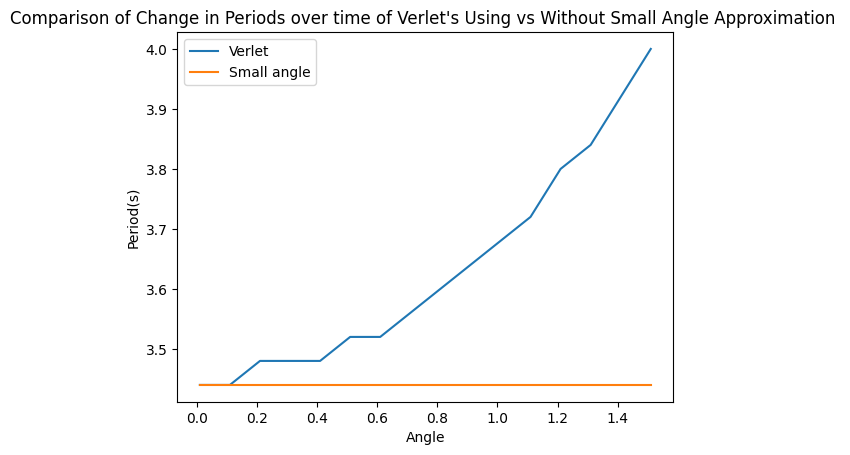

In [ ]:
L=3
g=9.81
theta_array=np.arange(0.01,np.pi/2,0.1)
period_list_verlet=[]
period_list_approx=[]
for theta_0 in theta_array:
  period_verlet,t_verlet,theta_verlet= verlet_algorithm(0.01,30,theta_0,0)
  period_list_verlet.append(period_verlet)
  period_approx,t_approx,theta_approx= small_angle_verlet(0.01,30,theta_0,0)
  period_list_approx.append(period_approx)
plt.plot(theta_array, period_list_verlet,label='Verlet')
plt.plot(theta_array, period_list_approx,label='Small angle')
print( np.pi*2*math.sqrt(L/g))
print(f'''Verlet initial period:{period_list_verlet[0]}
Verlet final period: {period_list_verlet[-1]}''')
print(f'''Aprrox initial period: {period_list_approx[0]}
Approx final period: {period_list_approx[-1]} ''')
plt.legend()
plt.title("Comparison of Change in Periods over time of Verlet's Using vs Without Small Angle Approximation ")
plt.xlabel("Angle")
plt.ylabel("Period(s)")

# Comparing Verlet Using and Without Small Angle Approximation

1.51


Text(0, 0.5, 'Angle')

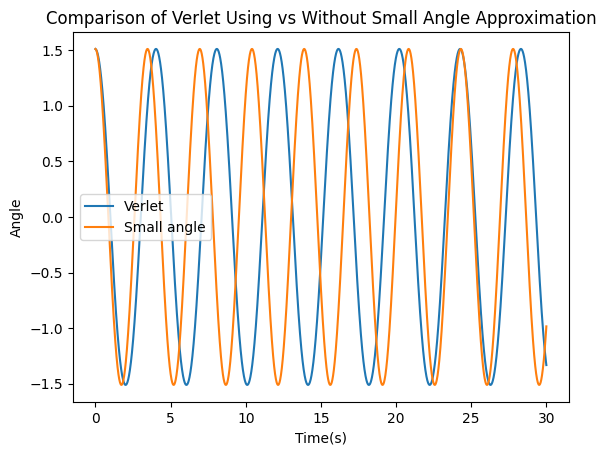

In [ ]:
print(theta_0)
verlet_algorithm_graph(0.01,30,theta_0,0)
small_angle_verlet_graph(0.01,30,theta_0,0)
plt.legend()
plt.title("Comparison of Verlet Using vs Without Small Angle Approximation")
plt.xlabel("Time(s)")
plt.ylabel("Angle")

# Amplitude of Euler's Method Without Small Angle Approximation

Text(0.5, 1.0, "Change in Amplitude over Time of Euler's Without Small Angle Approximation")

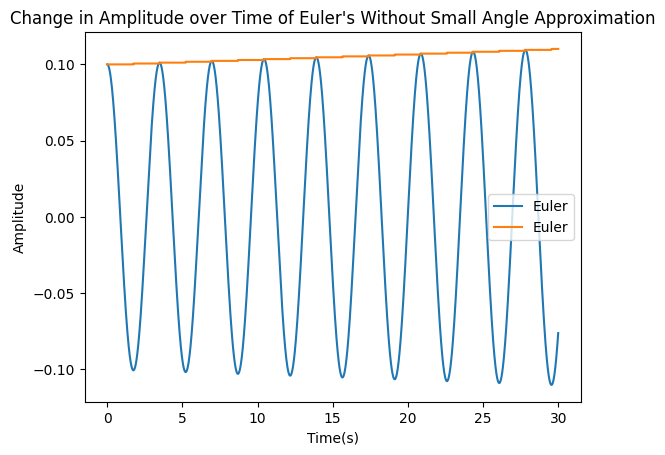

In [ ]:
def euler_amplitude(DT,T_MAX,theta_0,omega_0):
#CONSTANTS
  STEPS = int(T_MAX/DT)
  g=9.81
  L= 3 #Length
  amplitude = [theta_0]
  alpha_0= -(g/1)*theta_0


  # Setup where first element is set based on initial conditions
  t = [0]
  delta=0
  theta=[theta_0]
  omega=[omega_0]
  alpha=[alpha_0]


  # Main Loop
  for i in range(STEPS):
    t.append(t[i]+DT)
    alpha.append((-g/L)*math.sin(theta[i]) )
    omega.append(omega[i]+alpha[i]*DT)
    theta.append(theta[i]+omega[i]*DT)
    if omega[i-1] * omega[i+1]<0 or t[i] == 0 :
      amplitude.append(abs(theta[i]))
    else:
      amplitude.append(amplitude[i-1])
  return amplitude, t, theta

amplitude_e, t_e, theta_e = euler_amplitude(0.001,30,0.1,0)

plt.plot(t_e,theta_e,label='Euler')


plt.plot(t_e,amplitude_e,label='Euler')
plt.legend()
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.title("Change in Amplitude over Time of Euler's Without Small Angle Approximation")


# Amplitude of Euler's Method Using Small Angle Approximation

Text(0.5, 1.0, "Change in Amplitude over Time of Euler's Using Small Angle Approximation")

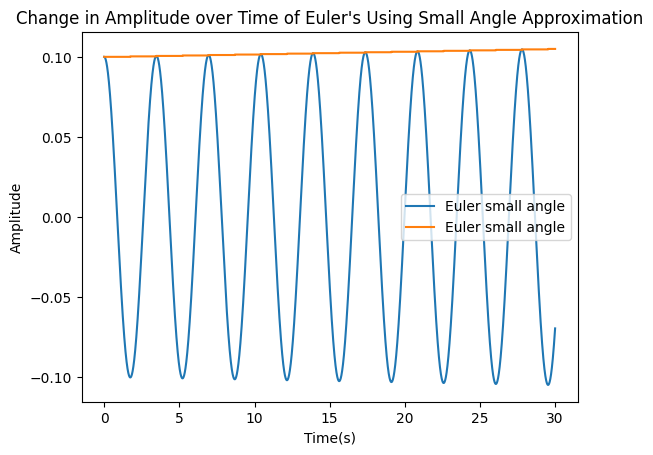

In [ ]:
def small_angle_euler_amplitude(DT,T_MAX,theta_0,omega_0):

  STEPS = int(T_MAX/DT)
  g=9.81
  L= 3 #Length
  amplitude = [theta_0]

  #INITIAL CONDITIONS

  alpha_0= -(g/1)*theta_0

  t = [0]
  delta=0
  theta=[theta_0]
  omega=[omega_0]
  alpha=[alpha_0]


  for i in range(STEPS):
    t.append(t[i]+DT)
    omega.append(omega[i]+alpha[i]*DT)
    theta.append(theta[i]+(omega[i]*DT+delta))
    alpha.append((-g/L)*theta[i+1])
    if omega[i-1] * omega[i+1]<0 or t[i] == 0 :
      amplitude.append(abs(theta[i]))
    else:
      amplitude.append(amplitude[i-1])
  return amplitude, t, theta

amplitude_e_sa, t_e_sa, theta_e_sa = small_angle_euler_amplitude(0.001,30,0.1,0)

plt.plot(t_e_sa,theta_e_sa,label='Euler small angle')


plt.plot(t_e_sa,amplitude_e_sa,label='Euler small angle')
plt.legend()
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.title("Change in Amplitude over Time of Euler's Using Small Angle Approximation")

# Amplitude of Verlet's Method Using Small Angle Approximation

Text(0.5, 1.0, "Change in Amplitude over Time of Verlet's Using Small Angle Approximation")

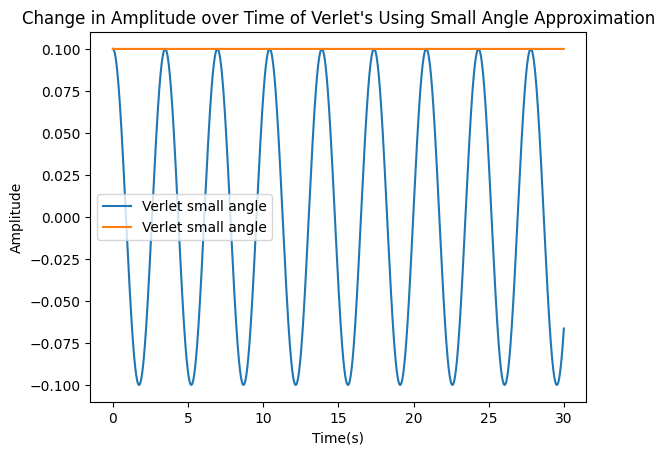

In [ ]:
def small_angle_verlet_amplitude(DT,T_MAX,theta_0,omega_0):

  STEPS = int(T_MAX/DT)
  g=9.81
  L= 3 #Length
  amplitude = [theta_0]

  #INITIAL CONDITIONS

  alpha_0= -(g/1)*theta_0

  t = [0]
  delta=0
  theta=[theta_0]
  omega=[omega_0]
  alpha=[alpha_0]


  for i in range(STEPS):
    t.append(t[i]+DT)
    theta.append(theta[i]+omega[i]*DT +0.5*alpha[i]*DT**2)
    alpha.append((-g/L)*theta[i+1])
    omega.append(omega[i]+0.5*(alpha[i]+alpha[i+1])*DT)
    if omega[i-1] * omega[i+1]<0 or t[i] == 0 :
      amplitude.append(abs(theta[i]))
    else:
      amplitude.append(amplitude[i-1])
  return amplitude, t, theta

amplitude_v_sa, t_v_sa, theta_v_sa = small_angle_verlet_amplitude(0.001,30,0.1,0)

plt.plot(t_v_sa,theta_v_sa,label='Verlet small angle')


plt.plot(t_v_sa,amplitude_v_sa,label='Verlet small angle')
plt.legend()
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.title("Change in Amplitude over Time of Verlet's Using Small Angle Approximation")

# Amplitude of Verlet's Method Without Small Angle Approximation

Text(0.5, 1.0, "Change in Amplitude over Time of Verlet's Without Small Angle Approximation")

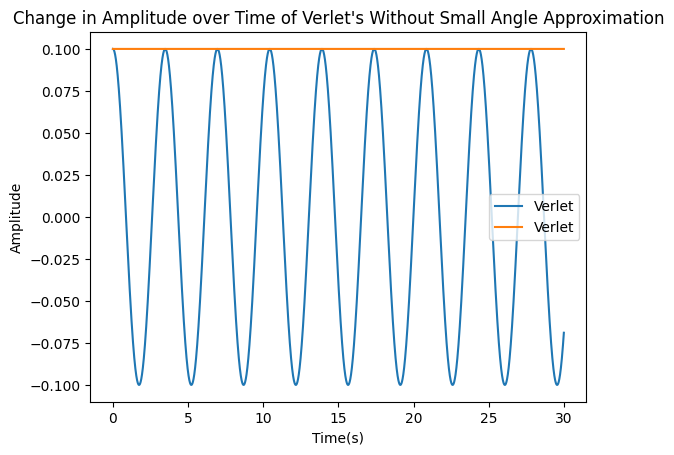

In [ ]:
def verlet_amplitude(DT,T_MAX,theta_0,omega_0):
  STEPS = int(T_MAX/DT)
  g=9.81
  L= 3 #Length
  amplitude = [theta_0]
  #INITIAL CONDITIONS

  alpha_0= -(g/1)*theta_0

  # Setup where first element is set based on initial conditions
  t = [0]
  delta=0

  theta=[theta_0]
  omega=[omega_0]
  alpha=[alpha_0]

  for i in range(STEPS):
    t.append(t[i]+DT)
    theta.append(theta[i]+omega[i]*DT +0.5*alpha[i]*DT**2)
    alpha.append((-g/L)*math.sin(theta[i+1]))
    omega.append(omega[i]+0.5*(alpha[i]+alpha[i+1])*DT)
    if omega[i-1] * omega[i+1]<0 or t[i] == 0 :
      amplitude.append(abs(theta[i]))
    else:
      amplitude.append(amplitude[i-1])
  return amplitude, t, theta

amplitude_v, t_v, theta_v = verlet_amplitude(0.001,30,0.1,0)

plt.plot(t_v,theta_v,label='Verlet')


plt.plot(t_v,amplitude_v,label='Verlet')
plt.legend()
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.title("Change in Amplitude over Time of Verlet's Without Small Angle Approximation")

# Comparing All Amplitudes

Text(0.5, 1.0, 'Comparison of Change in Amplitude over Time of All Methods')

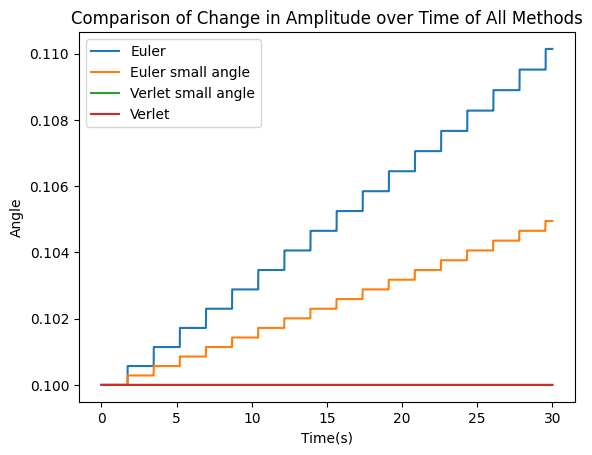

In [ ]:
plt.plot(t_e,amplitude_e,label='Euler')
plt.plot(t_e_sa,amplitude_e_sa,label='Euler small angle')
plt.plot(t_v_sa,amplitude_v_sa,label='Verlet small angle')
plt.plot(t_v,amplitude_v,label='Verlet')
plt.legend()
plt.xlabel("Time(s)")
plt.ylabel("Angle")
plt.title("Comparison of Change in Amplitude over Time of All Methods")